In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model18_0 = Model0(
    norm=nn.BatchNorm2d(10),
    pool=lambda x : HybridPoolingV0(x,pool1 = nn.AvgPool2d, pool2 = None),
    post_conv=post_conv0,
    ratio = 3
)
he_initialization(model18_0)
describe(model18_0)

MACs: 34.11 MMac, Params: 12.48 k
Layer (type:depth-idx)                   Output Shape              Param #
Model0                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 128, 128]         1,000
│    └─Sequential: 2-2                   [1, 20, 128, 128]         --
│    │    └─BatchNorm2d: 3-1             [1, 20, 128, 128]         40
│    │    └─PReLU: 3-2                   [1, 20, 128, 128]         1
│    └─HybridPoolingV0: 2-3              [1, 20, 64, 64]           --
│    │    └─AvgPool2d: 3-3               [1, 20, 64, 64]           --
│    │    └─Sequential: 3-4              [1, 20, 64, 64]           40
│    └─Conv2d: 2-4                       [1, 10, 64, 64]           990
│    └─Sequential: 2-5                   [1, 10, 64, 64]           --
│    │    └─BatchNorm2d: 3-5             [1, 10,

Loading checkpoint from model_weights/model18_0.pt
Starting
Epoch 1/10: Train loss = 0.4888, Train accuracy = 0.7645, Test loss = 0.4978, Test accuracy = 0.7560


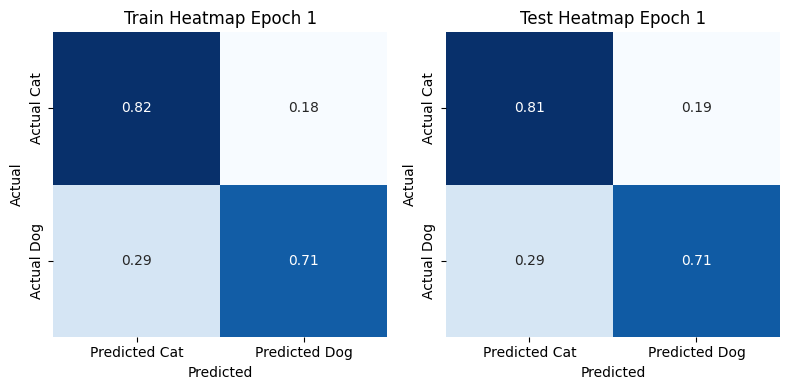

Epoch 2/10: Train loss = 0.5178, Train accuracy = 0.7429, Test loss = 0.5274, Test accuracy = 0.7354


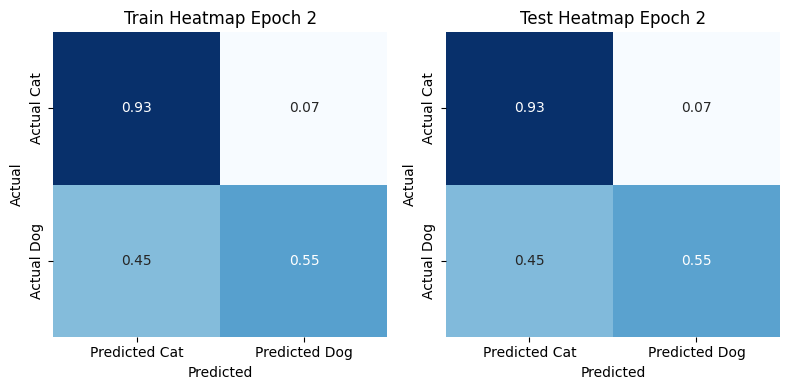

Epoch 3/10: Train loss = 0.3812, Train accuracy = 0.8281, Test loss = 0.4084, Test accuracy = 0.8129


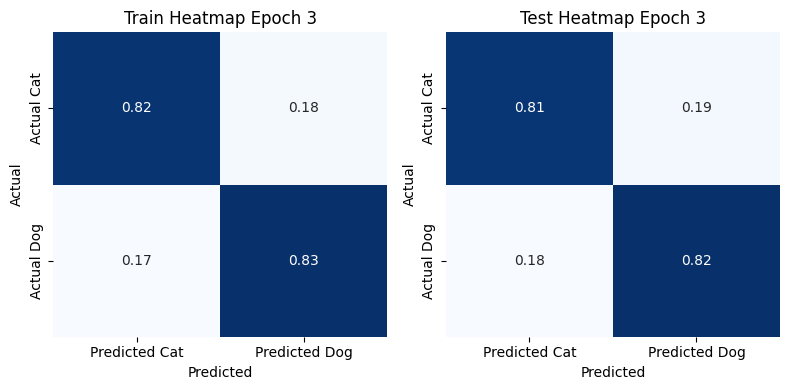

Epoch 4/10: Train loss = 0.4179, Train accuracy = 0.8092, Test loss = 0.4442, Test accuracy = 0.7985


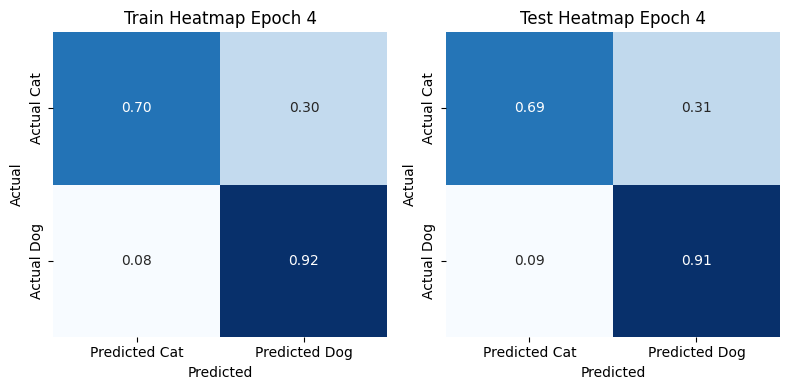

Epoch 5/10: Train loss = 0.3509, Train accuracy = 0.8476, Test loss = 0.3920, Test accuracy = 0.8269


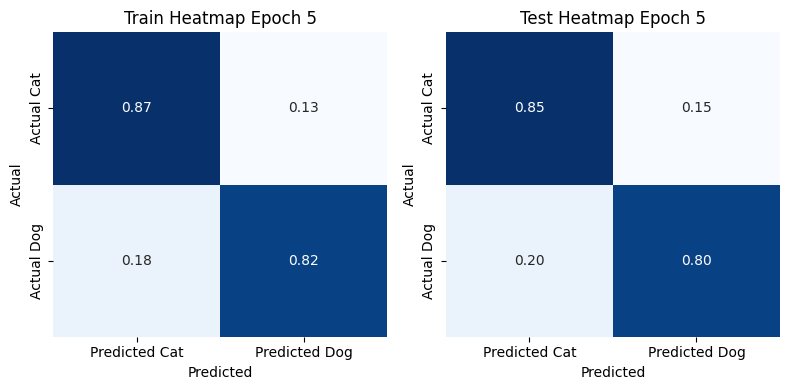

Epoch 6/10: Train loss = 0.3188, Train accuracy = 0.8637, Test loss = 0.3566, Test accuracy = 0.8421


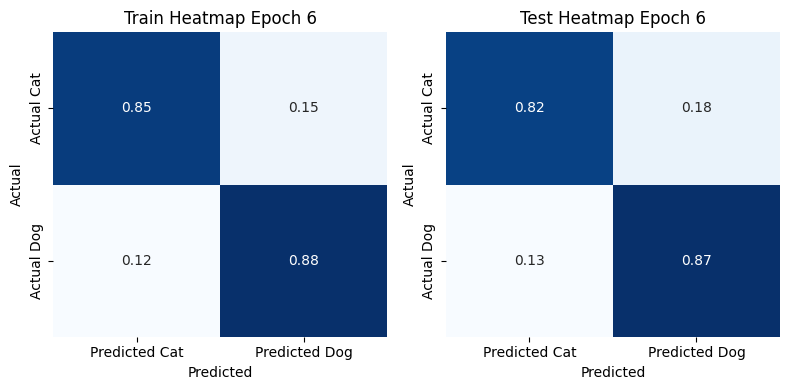

Epoch 7/10: Train loss = 0.3224, Train accuracy = 0.8571, Test loss = 0.3574, Test accuracy = 0.8388


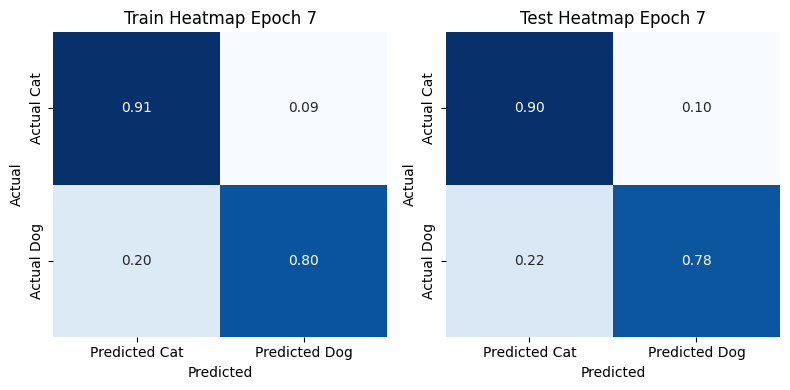

Epoch 8/10: Train loss = 0.2766, Train accuracy = 0.8826, Test loss = 0.3223, Test accuracy = 0.8566


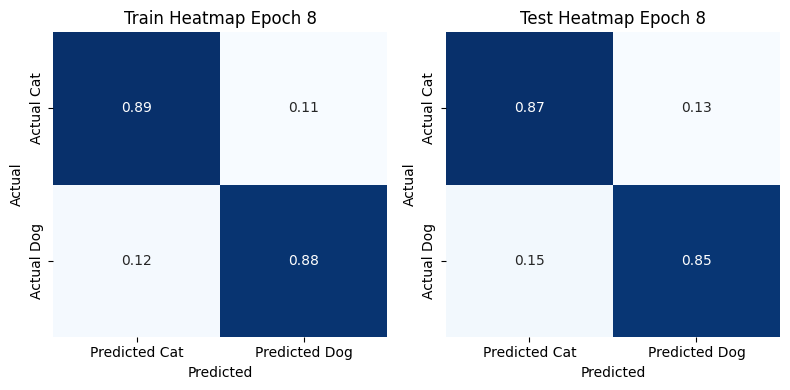

Epoch 9/10: Train loss = 0.2719, Train accuracy = 0.8864, Test loss = 0.3208, Test accuracy = 0.8591


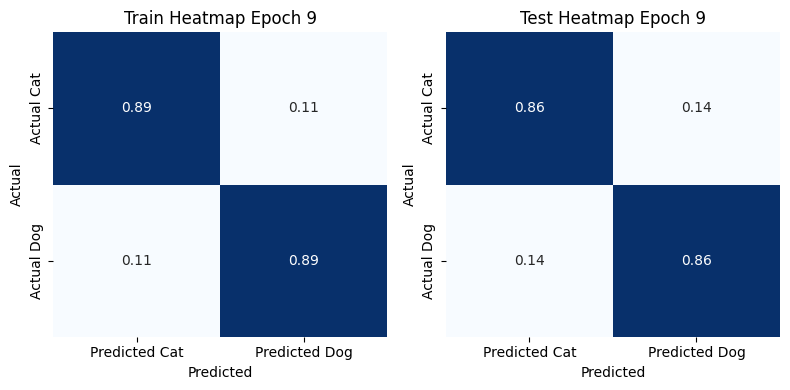

Epoch 10/10: Train loss = 0.2697, Train accuracy = 0.8846, Test loss = 0.3230, Test accuracy = 0.8587


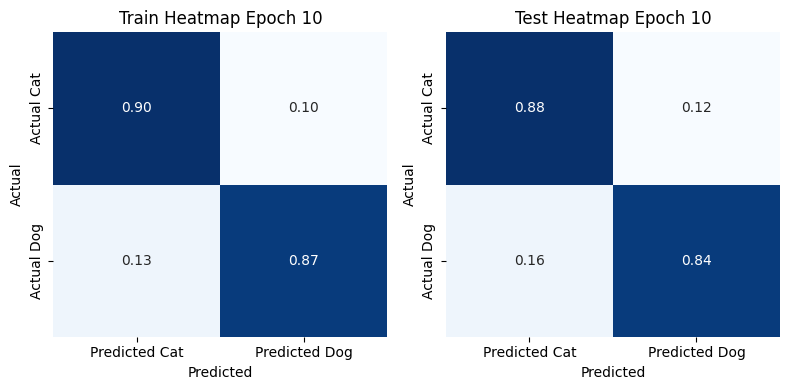

Training complete.


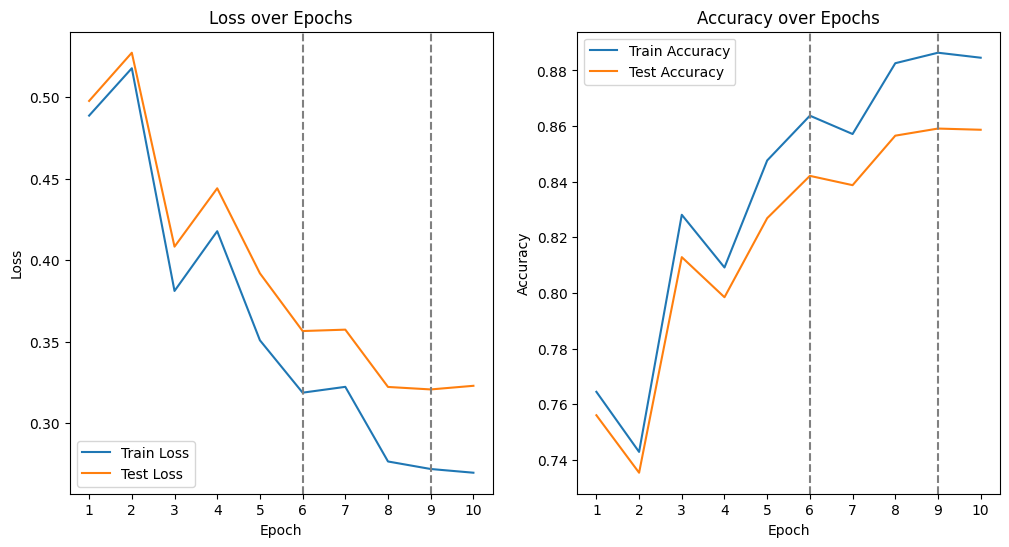

In [5]:
train(model18_0,"model_weights/model18_0.pt",criterion,train_dataset,test_dataset)